## Discrete state Markov chain

Predict the weather in Berkeley...

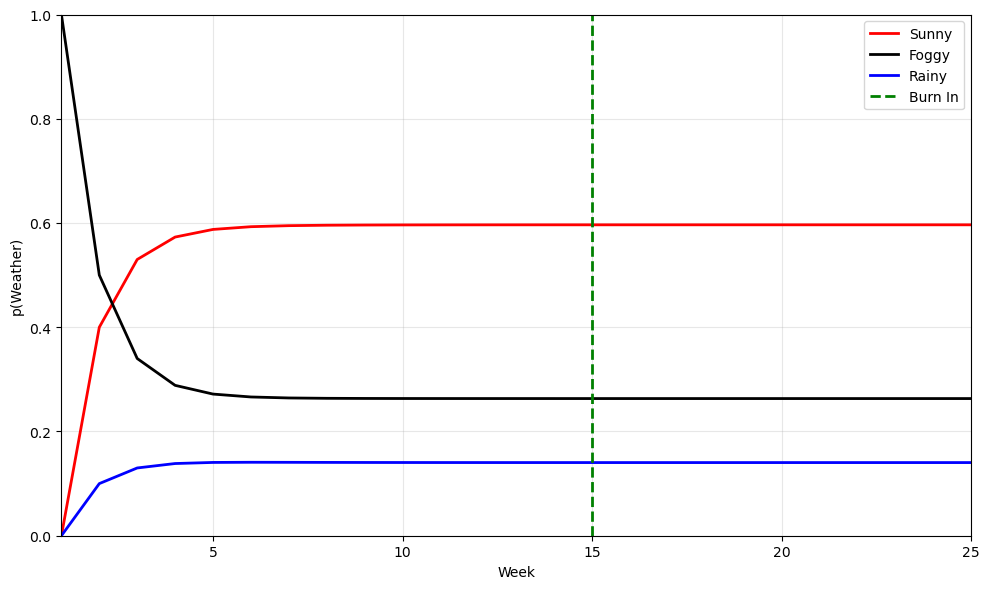


p(weather) in 1 week --> [0.4 0.5 0.1]

p(weather) in 2 weeks --> [0.53 0.34 0.13]

p(weather) in 6 months --> [0.59649117 0.26315792 0.14035091]

Steady state probabilities: [0.59649117 0.26315792 0.14035091]
Convergence check - difference from previous week: [4.36787235e-08 1.71396378e-08 2.65390857e-08]

Transition matrix row sums (should be 1.0): [1. 1. 1.]

Theoretical steady state: [0.59649123 0.26315789 0.14035088]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# FINITE STATE-SPACE MARKOV CHAIN EXAMPLE

# TRANSITION OPERATOR
#     S  F  R
#     U  O  A
#     N  G  I
#     N  G  N
#     Y  Y  Y
P = np.array([[0.8, 0.15, 0.05],  # SUNNY
              [0.4, 0.5,  0.1],   # FOGGY
              [0.1, 0.3,  0.6]])  # RAINY

nWeeks = 25

# INITIAL STATE IS RAINY
X = np.zeros((nWeeks, 3))
#X[0, :] = [0, 0, 1]
# INITIAL STATE IS SUNNY
#X[0, :] = [1, 0, 0]
# INITIAL STATE IS FOGGY
X[0, :] = [0, 1, 0]

# RUN MARKOV CHAIN
for iB in range(1, nWeeks):
    X[iB, :] = X[iB-1, :] @ P  # TRANSITION (using @ for matrix multiplication)

# DISPLAY
plt.figure(figsize=(10, 6))
weeks = np.arange(1, nWeeks + 1)

h1 = plt.plot(weeks, X[:, 0], 'r', linewidth=2, label='Sunny')
h2 = plt.plot(weeks, X[:, 1], 'k', linewidth=2, label='Foggy') 
h3 = plt.plot(weeks, X[:, 2], 'b', linewidth=2, label='Rainy')
h4 = plt.axvline(x=15, color='g', linestyle='--', linewidth=2, label='Burn In')

plt.legend()
plt.xlabel('Week')
plt.ylabel('p(Weather)')
plt.xlim([1, nWeeks])
plt.ylim([0, 1])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# PREDICTIONS
print(f"\np(weather) in 1 week --> {X[1, :]}")
print(f"\np(weather) in 2 weeks --> {X[2, :]}")
print(f"\np(weather) in 6 months --> {X[24, :]}")

# Additional analysis - steady state
print(f"\nSteady state probabilities: {X[-1, :]}")
print(f"Convergence check - difference from previous week: {np.abs(X[-1, :] - X[-2, :])}")

# Verify transition matrix properties
print(f"\nTransition matrix row sums (should be 1.0): {np.sum(P, axis=1)}")

# Calculate theoretical steady state (eigenvector approach)
eigenvalues, eigenvectors = np.linalg.eig(P.T)
steady_state_index = np.argmax(eigenvalues.real)
steady_state = np.abs(eigenvectors[:, steady_state_index].real)
steady_state = steady_state / np.sum(steady_state)
print(f"\nTheoretical steady state: {steady_state}")